##  **1. Introduction** 

Ini Inroduction Final Project

## **2. Import Libraries** 

In [1]:
#import libraries 
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams

from scipy.stats import boxcox
rcParams['figure.figsize']=10,6

## **3. Data Loading** 

In [2]:
df= pd.read_csv('Schroder Dana Terpadu II.csv')

In [3]:
df

,Date,Price,Open,High,Low,Change %
0,"Dec 11, 2022","4,519.610","4,513.620","4,539.640","4,510.570",-0.25%
1,"Dec 04, 2022","4,530.780","4,593.370","4,593.370","4,521.540",-1.77%
2,"Nov 27, 2022","4,612.450","4,540.590","4,612.450","4,540.590",1.65%
3,"Nov 20, 2022","4,537.630","4,492.950","4,541.690","4,489.790",1.12%
4,"Nov 13, 2022","4,487.530","4,490.020","4,497.560","4,470.850",-0.30%
...,...,...,...,...,...,...
276,"Aug 06, 2017","3,562.960","3,544.650","3,578.840","3,544.650",0.42%
277,"Jul 30, 2017","3,548.100","3,572.480","3,572.480","3,548.100",-0.72%
278,"Jul 23, 2017","3,573.920","3,580.190","3,583.910","3,573.410",0.27%
279,"Jul 16, 2017","3,564.250","3,580.200","3,581.890","3,564.250",-0.50%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      281 non-null    object
 1   Price     281 non-null    object
 2   Open      281 non-null    object
 3   High      281 non-null    object
 4   Low       281 non-null    object
 5   Change %  281 non-null    object
dtypes: object(6)
memory usage: 13.3+ KB


In [5]:
col = ['Price',	'Open',	'High',	'Low']

for i in col:

    df[i] = (df[i]
                # .str.replace(".","")
                .str.replace(",","")
                .astype(float)
                )

df['Change %'] = (df['Change %']
                .str.replace("%"," ")
                # .str.replace(",",".")
                .astype(float)
                )

df["Date"] = pd.to_datetime(df["Date"])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281 entries, 0 to 280
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      281 non-null    datetime64[ns]
 1   Price     281 non-null    float64       
 2   Open      281 non-null    float64       
 3   High      281 non-null    float64       
 4   Low       281 non-null    float64       
 5   Change %  281 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 13.3 KB


In [7]:
df

,Date,Price,Open,High,Low,Change %
0,2022-12-11,4519.61,4513.62,4539.64,4510.57,-0.25
1,2022-12-04,4530.78,4593.37,4593.37,4521.54,-1.77
2,2022-11-27,4612.45,4540.59,4612.45,4540.59,1.65
3,2022-11-20,4537.63,4492.95,4541.69,4489.79,1.12
4,2022-11-13,4487.53,4490.02,4497.56,4470.85,-0.30
...,...,...,...,...,...,...
276,2017-08-06,3562.96,3544.65,3578.84,3544.65,0.42
277,2017-07-30,3548.10,3572.48,3572.48,3548.10,-0.72
278,2017-07-23,3573.92,3580.19,3583.91,3573.41,0.27
279,2017-07-16,3564.25,3580.20,3581.89,3564.25,-0.50


## **4. EDA (Exploratory Data Analysis)**

Text(0.5, 1.0, 'Plotting Price against the Entire Timeframe For all the columns')

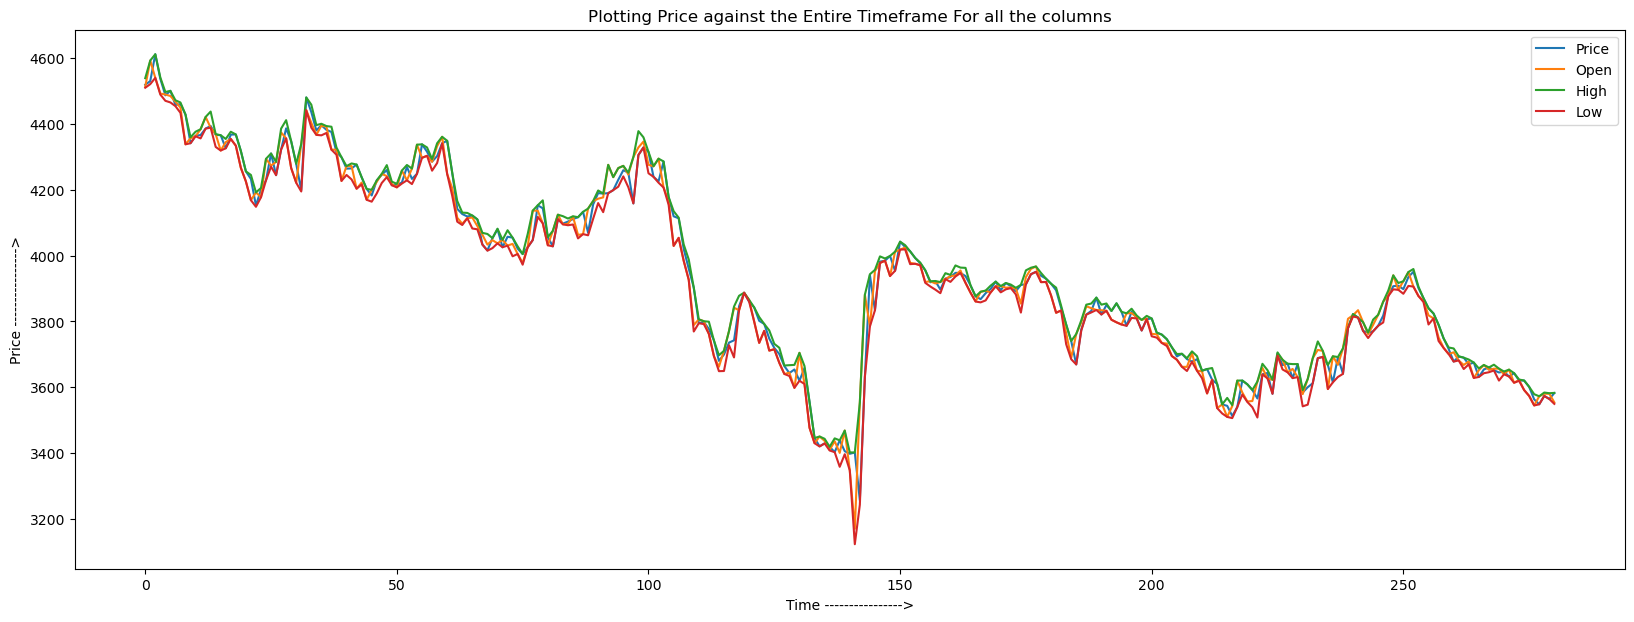

In [8]:
df[['Price','Open',	'High',	'Low']].plot(figsize=(20,7))
plt.legend(loc="best")
plt.xlabel("Time ---------------->")
plt.ylabel("Price ---------------->")
plt.title("Plotting Price against the Entire Timeframe For all the columns")

In [9]:
df = df.sort_values(['Date'],ascending=True).reset_index()

In [10]:
df

,index,Date,Price,Open,High,Low,Change %
0,280,2017-07-09,3582.20,3554.10,3582.79,3549.42,0.25
1,279,2017-07-16,3564.25,3580.20,3581.89,3564.25,-0.50
2,278,2017-07-23,3573.92,3580.19,3583.91,3573.41,0.27
3,277,2017-07-30,3548.10,3572.48,3572.48,3548.10,-0.72
4,276,2017-08-06,3562.96,3544.65,3578.84,3544.65,0.42
...,...,...,...,...,...,...,...
276,4,2022-11-13,4487.53,4490.02,4497.56,4470.85,-0.30
277,3,2022-11-20,4537.63,4492.95,4541.69,4489.79,1.12
278,2,2022-11-27,4612.45,4540.59,4612.45,4540.59,1.65
279,1,2022-12-04,4530.78,4593.37,4593.37,4521.54,-1.77


In [11]:
new_df=df[['Date','High','Low']]

In [12]:
new_df=new_df.set_index(['Date'])

In [13]:
new_df

,High,Low
Date,,
2017-07-09,3582.79,3549.42
2017-07-16,3581.89,3564.25
2017-07-23,3583.91,3573.41
2017-07-30,3572.48,3548.10
2017-08-06,3578.84,3544.65
...,...,...
2022-11-13,4497.56,4470.85
2022-11-20,4541.69,4489.79
2022-11-27,4612.45,4540.59


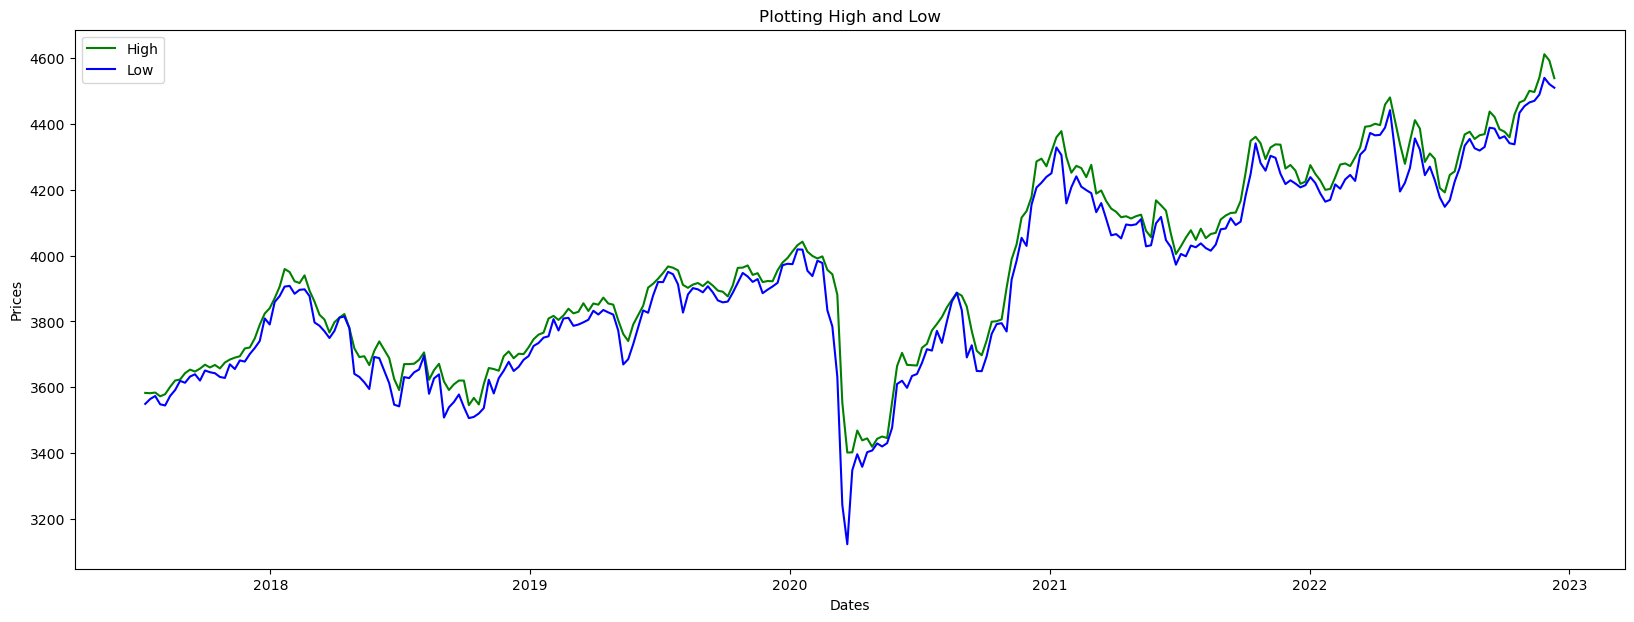

In [14]:
plt.figure(figsize=(20,7))
plt.plot(new_df['High'], color='green', label='High')
plt.plot(new_df['Low'], color='blue', label='Low')
plt.title('Plotting High and Low')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

## **5. Data Preprocessing**

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 1600x900 with 0 Axes>

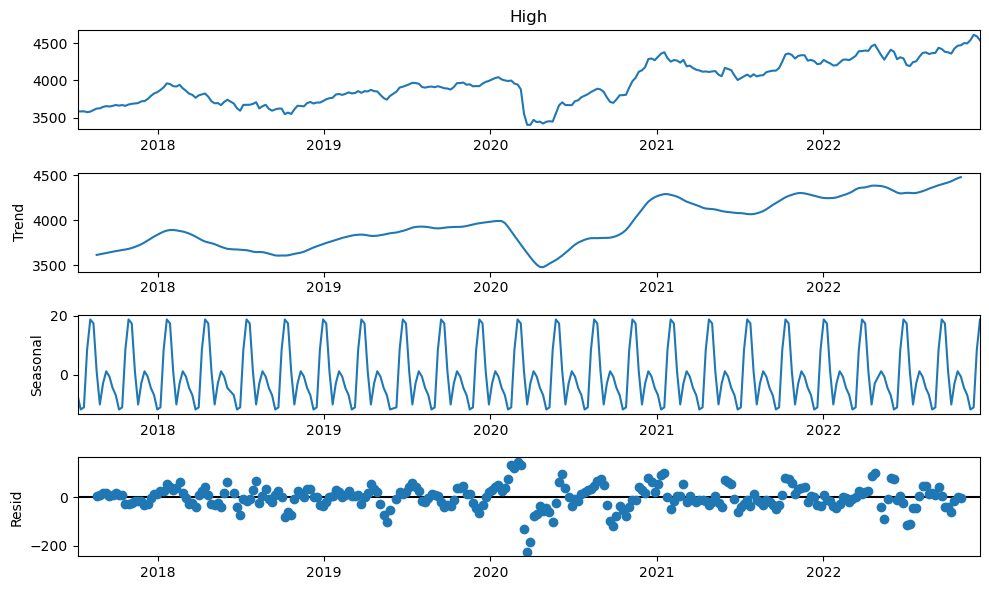

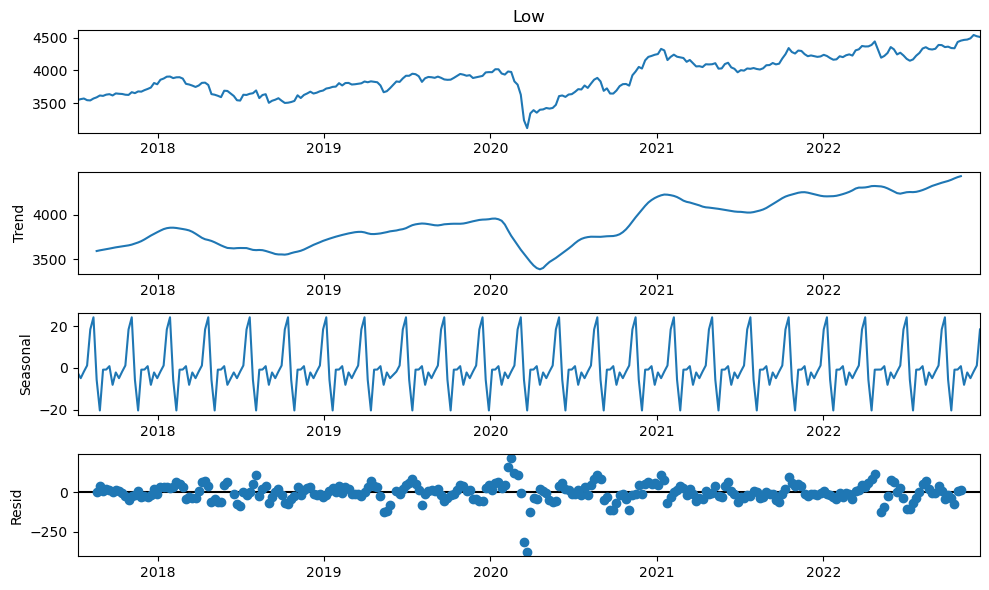

In [16]:
fig = plt.figure() 
fig.set_size_inches(16, 9)

result_H = seasonal_decompose(new_df['High'], period=12)
result_L = seasonal_decompose(new_df['Low'], period=12)
 
fig = result_H.plot() 
fig = result_L.plot() 

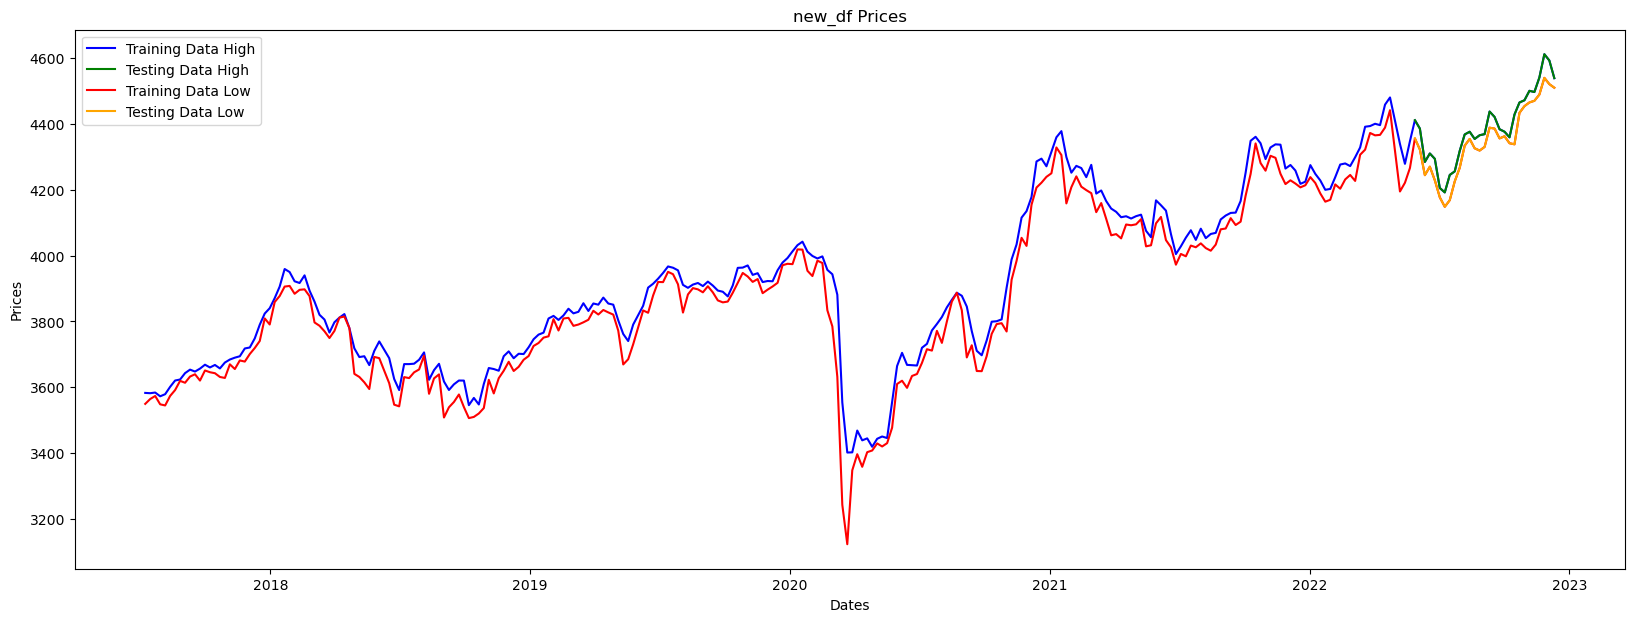

In [17]:
train_data, test_data = new_df[0:int(len(new_df)*0.9)], new_df[int(len(new_df)*0.9):]


plt.figure(figsize=(20,7))
plt.title('new_df Prices')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.plot(new_df['High'], 'blue', label='Training Data High')
plt.plot(test_data['High'], 'green', label='Testing Data High')
plt.plot(new_df['Low'], 'red', label='Training Data Low')
plt.plot(test_data['Low'], 'orange', label='Testing Data Low')
plt.legend()

In [18]:
train_data

,High,Low
Date,,
2017-07-09,3582.79,3549.42
2017-07-16,3581.89,3564.25
2017-07-23,3583.91,3573.41
2017-07-30,3572.48,3548.10
2017-08-06,3578.84,3544.65
...,...,...
2022-04-17,4459.16,4389.36
2022-04-24,4481.02,4442.28
2022-05-08,4339.59,4195.13


## **6. Modeling**

### **6.1 Model Definition**

We will use ARIMA for the time series prediction

### **6.2 Model Training**

In [19]:
from pmdarima.arima import auto_arima

model_autoARIMA_High = auto_arima(new_df['High'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=4, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=3024.844, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=2933.775, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.26 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=2993.077, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=2921.967, Time=0.14 sec
 ARIMA(1,1,0)(3,1,0)[4]             : AIC=2905.141, Time=0.22 sec
 ARIMA(1,1,0)(4,1,0)[4]             : AIC=2890.725, Time=0.34 sec
 ARIMA(1,1,0)(5,1,0)[4]             : AIC=2884.505, Time=0.53 sec
 ARIMA(1,1,0)(5,1,1)[4]             : AIC=inf, Time=2.19 sec
 ARIMA(1,1,0)(4,1,1)[4]             : AIC=inf, Time=0.84 sec
 ARIMA(0,1,0)(5,1,0)[4]             : AIC=2915.867, Time=0.56 sec
 ARIMA(2,1,0)(5,1,0)[4]             : AIC=2877.085, Time=0.53 sec
 ARIMA(2,1,0)(4,1,0)[4]             : AIC=2884.118, Time=0.40 sec
 ARIMA(2,1,0)(5,1,1)[4]             : AIC=inf, Time=1.20 sec
 ARIMA(2,1,0)(4,1,1)[4]             : AIC=inf, Time=0

In [35]:
model_autoARIMA_Low = auto_arima(new_df['Low'], start_p=0, d=1, start_q=0,
                                   max_p=5, max_d=5, max_q=5, start_P=0,
                                   D=1, start_Q=0, max_P=5, max_D=5,
                                   max_Q=5, m=4, seasonal=True,
                                   error_action='warn', trace=True,
                                   supress_warning=True, stepwise=True,
                                   random_state=420, n_fits=50)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[4]             : AIC=3170.323, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[4]             : AIC=3084.287, Time=0.10 sec
 ARIMA(0,1,1)(0,1,1)[4]             : AIC=inf, Time=0.15 sec
 ARIMA(1,1,0)(0,1,0)[4]             : AIC=3164.330, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[4]             : AIC=3068.165, Time=0.15 sec
 ARIMA(1,1,0)(3,1,0)[4]             : AIC=3056.289, Time=0.23 sec
 ARIMA(1,1,0)(4,1,0)[4]             : AIC=3043.392, Time=0.30 sec
 ARIMA(1,1,0)(5,1,0)[4]             : AIC=3036.387, Time=0.36 sec
 ARIMA(1,1,0)(5,1,1)[4]             : AIC=inf, Time=0.79 sec
 ARIMA(1,1,0)(4,1,1)[4]             : AIC=inf, Time=0.66 sec
 ARIMA(0,1,0)(5,1,0)[4]             : AIC=3041.245, Time=0.36 sec
 ARIMA(2,1,0)(5,1,0)[4]             : AIC=3036.806, Time=0.43 sec
 ARIMA(1,1,1)(5,1,0)[4]             : AIC=inf, Time=1.47 sec
 ARIMA(0,1,1)(5,1,0)[4]             : AIC=3035.361, Time=0.45 sec
 ARIMA(0,1,1)(4,1,0)[4]             : AIC=3042.647, T

In [21]:
import warnings
warnings.filterwarnings(action='ignore')

In [49]:
# High

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar_High = train_data['High'].values
test_ar_High = test_data['High'].values

history_High = [x for x in train_ar_High]
print(type(history_High))
predictions_High = list()
for t in range(len(test_ar_High)):
    model_High = ARIMA(history_High, order=(5,1,0))
    model_fit = model_High.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions_High.append(yhat)
    obs = test_ar_High[t]
    history_High.append(obs)


<class 'list'>


In [50]:
# Low

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))))

train_ar_Low = train_data['Low'].values
test_ar_Low = test_data['Low'].values

history_Low = [x for x in train_ar_Low]
print(type(history_Low))
predictions_Low = list()
for t in range(len(test_ar_Low)):
    model_Low = ARIMA(history_Low, order=(5,1,0))
    model_fit = model_Low.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions_Low.append(yhat)
    obs = test_ar_Low[t]
    history_Low.append(obs)


<class 'list'>


### **6.3 Model Evaluasi**

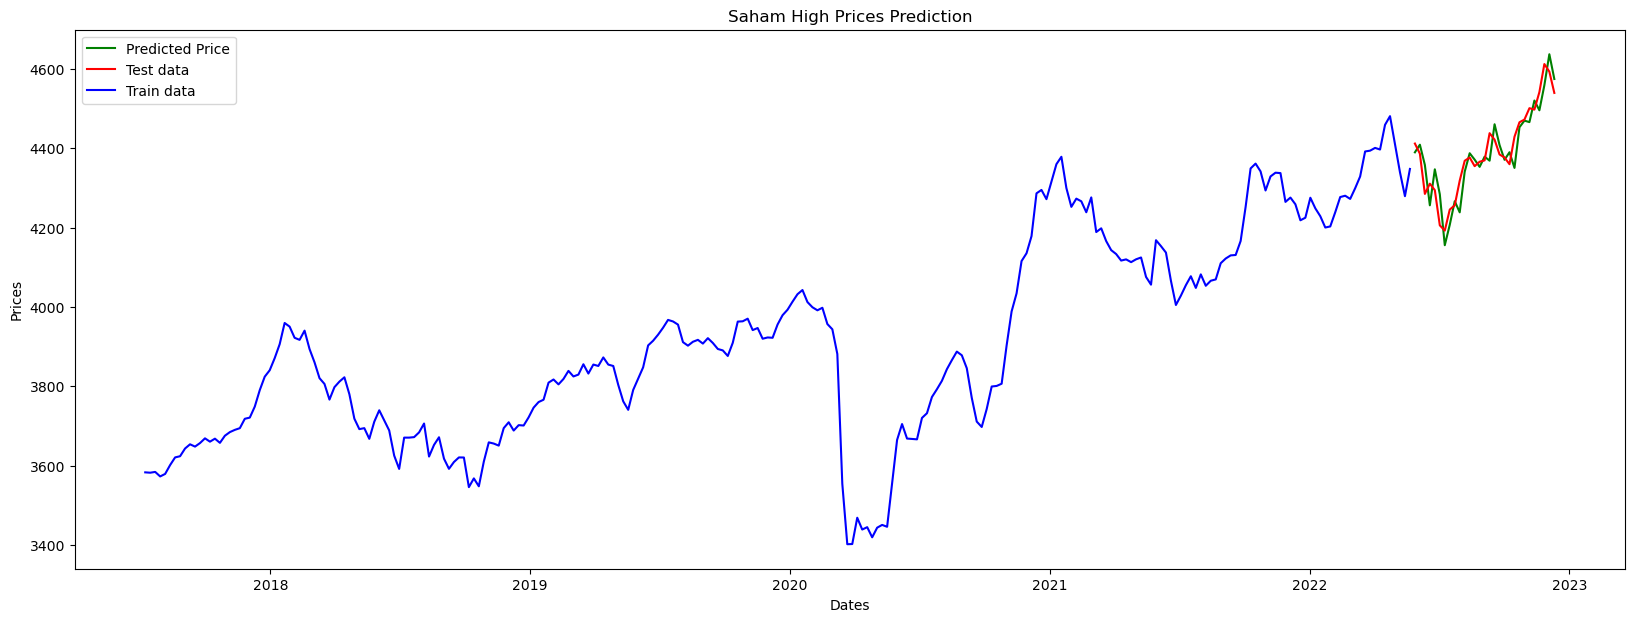

In [51]:
plt.figure(figsize=(20,7))

plt.plot(test_data.index, predictions_High, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data["High"], color='red', label='Test data')
plt.plot(train_data.index, train_data["High"], color='blue', label='Train data')
plt.title('Saham High Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

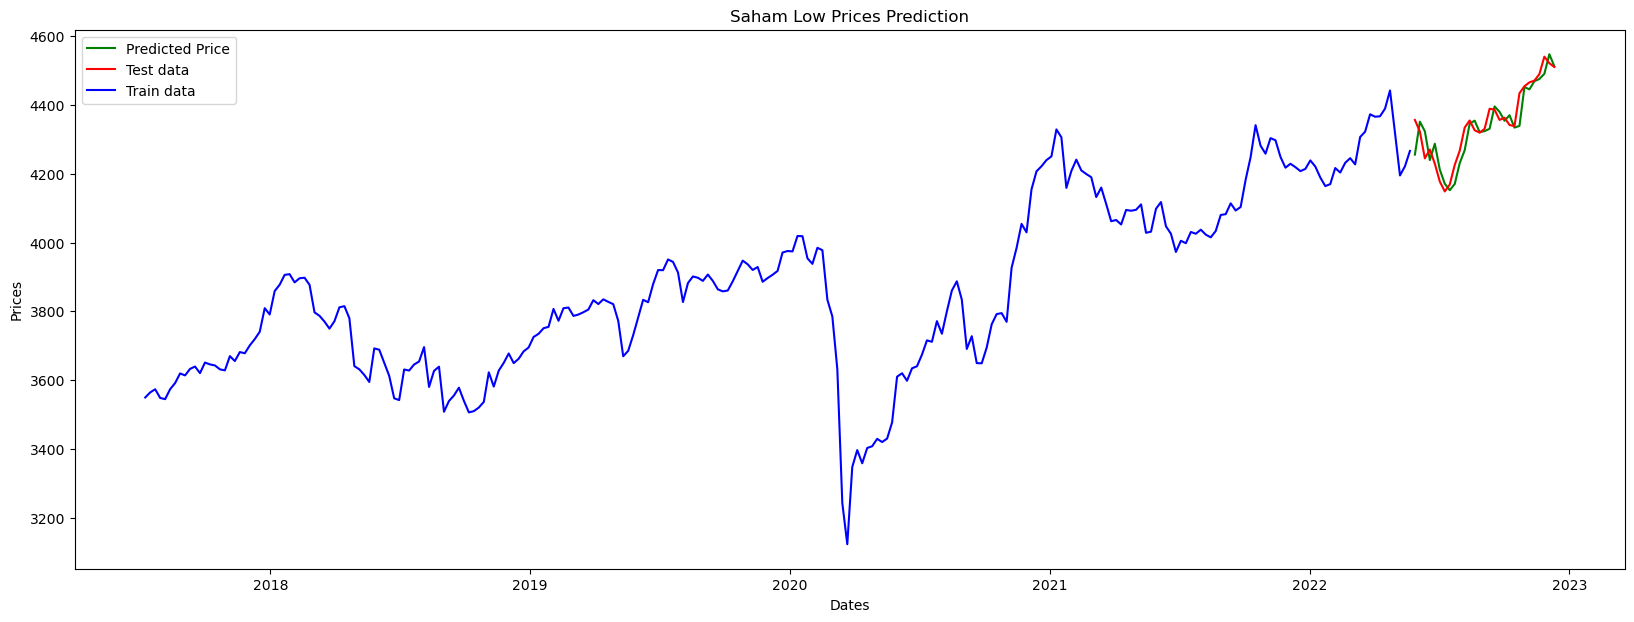

In [52]:
plt.figure(figsize=(20,7))

plt.plot(test_data.index, predictions_Low, color='green', label='Predicted Price')
plt.plot(test_data.index, test_data["Low"], color='red', label='Test data')
plt.plot(train_data.index, train_data["Low"], color='blue', label='Train data')
plt.title('Saham Low Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

In [53]:
# High

actual_High=pd.DataFrame()
actual_High=pd.DataFrame(test_ar_High,columns=["Actual_High"])
predicted_High=pd.DataFrame(list(predictions_High),columns=["Predicted_High"])
actual_High=actual_High.reset_index(drop=True)
predicted_High=predicted_High.reset_index(drop=True)
output_High=pd.concat([actual_High,predicted_High],axis=1)

# Low

actual_Low=pd.DataFrame()
actual_Low=pd.DataFrame(test_ar_Low,columns=["Actual_Low"])
predicted_Low=pd.DataFrame(list(predictions_Low),columns=["Predicted_Low"])
actual_Low=actual_Low.reset_index(drop=True)
predicted_Low=predicted_Low.reset_index(drop=True)
output_Low=pd.concat([actual_Low,predicted_Low],axis=1)

output = pd.concat([output_High, output_Low], axis=1)
output

,Actual_High,Predicted_High,Actual_Low,Predicted_Low
0,4411.97,4389.864047,4356.51,4255.793311
1,4386.30,4409.036851,4322.51,4351.461741
2,4284.97,4358.068746,4244.75,4323.545126
3,4310.77,4256.236923,4270.59,4239.724448
4,4294.44,4346.946444,4229.19,4287.405334
5,4205.72,4284.177871,4177.41,4212.081574
6,4192.39,4155.625632,4148.62,4171.192016
7,4245.46,4207.038455,4168.70,4152.233463
8,4256.28,4266.506911,4225.83,4170.335604
9,4318.44,4238.481688,4267.12,4230.901540


In [54]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [55]:
# High

MEAN_High = new_df['High'].mean()
MAE_High = mean_absolute_error(output['Actual_High'], output['Predicted_High'])
MSE_High = mean_squared_error(output['Actual_High'], output['Predicted_High'])
RMSE_High = np.sqrt(mean_squared_error(output['Actual_High'], output['Predicted_High']))
MAPE_High = mean_absolute_percentage_error(output['Actual_High'], output['Predicted_High'])

# Low

MEAN_Low = new_df['Low'].mean()
MAE_Low = mean_absolute_error(output['Actual_Low'], output['Predicted_Low'])
MSE_Low = mean_squared_error(output['Actual_Low'], output['Predicted_Low'])
RMSE_Low = np.sqrt(mean_squared_error(output['Actual_Low'], output['Predicted_Low']))
MAPE_Low = mean_absolute_percentage_error(output['Actual_Low'], output['Predicted_Low'])

In [56]:
nilai = [MEAN_High,MAE_High,MSE_High,RMSE_High,MAPE_High,MEAN_Low,MAE_Low,MSE_Low,RMSE_Low,MAPE_Low]
MEAN = []
MAE = []
MSE = []
RMSE = []
MAPE = []
for i in nilai:
    MEAN.append(MEAN_High)
    MAE.append(MAE_High)
    MSE.append(MSE_High)
    RMSE.append(RMSE_High)
    MAPE.append(MAPE_High)
    MEAN.append(MEAN_Low)
    MAE.append(MAE_Low)
    MSE.append(MSE_Low)
    RMSE.append(RMSE_Low)
    MAPE.append(MAPE_Low)
predict = ['High','Low']
score = pd.DataFrame(predict)
score.rename(columns={0:'Predict'},inplace = True)
score['MEAN']= (MEAN_High,MEAN_Low)
score['MAE']= (MAE_High,MAE_Low)
score['MSE']= (MSE_High,MSE_Low)
score['RMSE']=(RMSE_High,RMSE_Low)
score['MAPE']=(MAPE_High,MAPE_Low)

score

,Predict,MEAN,MAE,MSE,RMSE,MAPE
0,High,3959.173665,36.023132,1829.047388,42.767364,0.008222
1,Low,3915.193238,31.670673,1755.866916,41.903066,0.007309


## **7. Prediction**

In [57]:
# Create date for the predicted month
index_new = pd.DataFrame(pd.date_range('2022-12-18', periods=4, freq='W').to_period('D'), columns=['Date'])
index_new = pd.DataFrame(index_new['Date'].dt.to_timestamp(freq='W'))
index_new

,Date
0,2022-12-18
1,2022-12-25
2,2023-01-01
3,2023-01-08


In [58]:
# High

result_High =  model_High.fit()
  
# Forecast for the next 4 week
forecast_High = result_High.predict(start = len(new_df), 
                          end = (len(new_df)-1) + 4, 
                          typ = 'levels')

forecast_High = pd.concat([index_new.reset_index(drop=True), pd.DataFrame(forecast_High,columns=["Forecast"])], axis=1).set_index(["Date"])
forecast_High

,Forecast
Date,
2022-12-18,4575.501665
2022-12-25,4587.670579
2023-01-01,4589.547921
2023-01-08,4586.156669


In [59]:
# Low

result_Low =  model_Low.fit()
  
# Forecast for the next 4 week
forecast_Low = result_Low.predict(start = len(new_df), 
                          end = (len(new_df)-1) + 4, 
                          typ = 'levels')

forecast_Low = pd.concat([index_new.reset_index(drop=True), pd.DataFrame(forecast_Low,columns=["Forcast"])], axis=1).set_index(["Date"])
forecast_Low

,Forcast
Date,
2022-12-18,4515.863812
2022-12-25,4518.677901
2023-01-01,4516.113502
2023-01-08,4515.569416


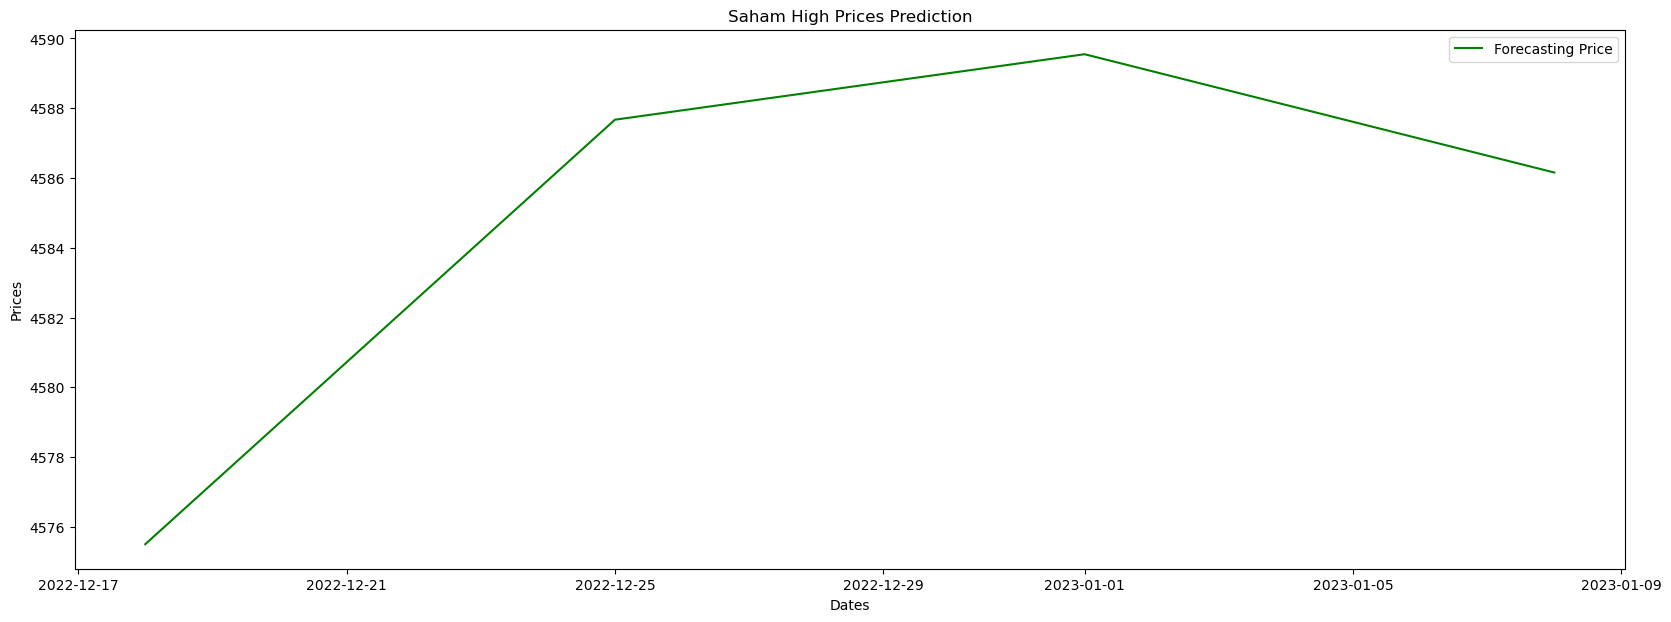

In [60]:
plt.figure(figsize=(20,7))
plt.plot(forecast_High, color='green', label='Forecasting Price')
plt.title('Saham High Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()

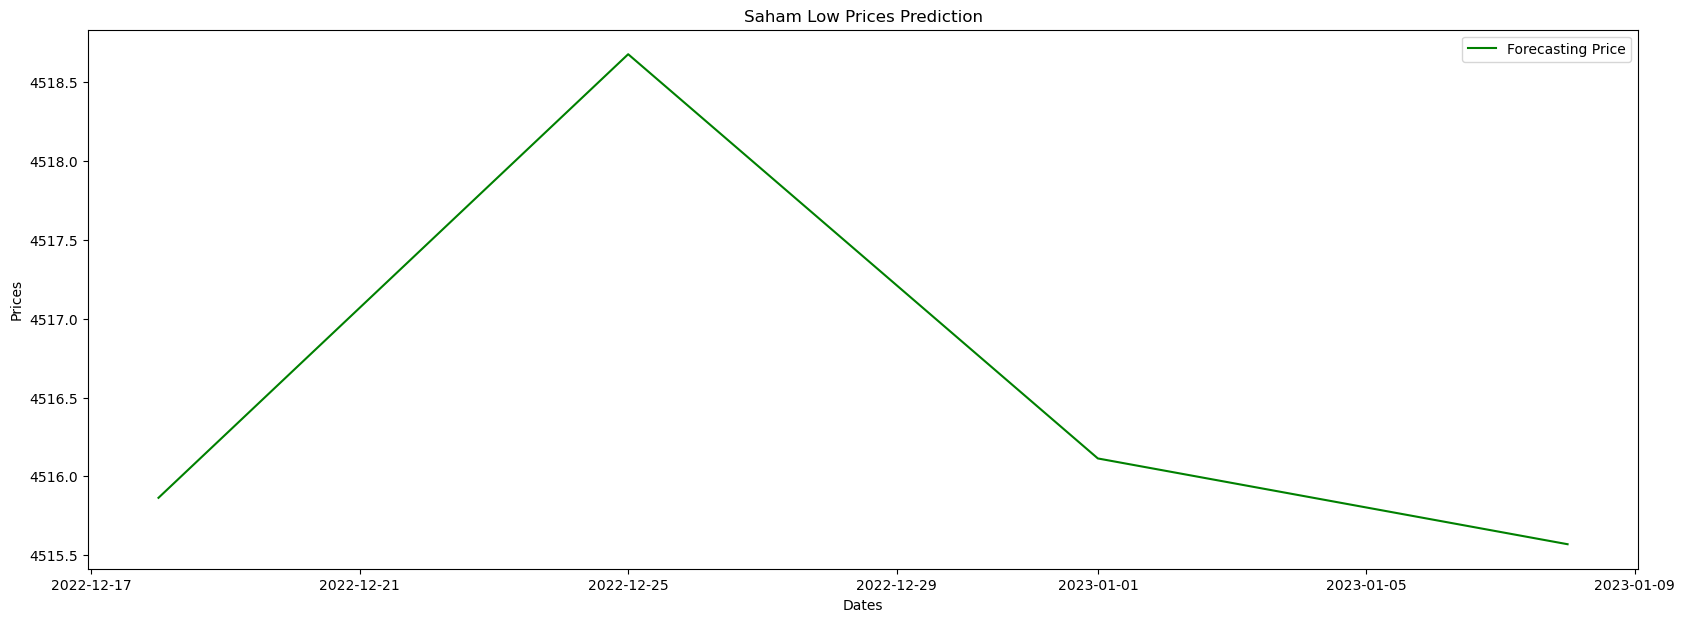

In [61]:
plt.figure(figsize=(20,7))
plt.plot(forecast_Low, color='green', label='Forecasting Price')
plt.title('Saham Low Prices Prediction')
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.legend()